In [1]:
import sklearn
import numpy as np
import pandas as pd
import datetime


In [2]:
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)

0.22.1
1.18.1
1.0.1


In [3]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')
automobile_df.head(20)
automobile_df.shape

(398, 9)

In [4]:
automobile_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
# replace ? values with nan

automobile_df = automobile_df.replace('?',np.nan)
automobile_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [6]:
#no of nan values in col
automobile_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
#replace nan values with mean val of col
#automobile_df['mpg'] = automobile_df['mpg'].fillna(automobile_df['mpg'].mean())

automobile_df = automobile_df.dropna()
automobile_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
automobile_df.shape


(392, 9)

In [9]:
#replace ? value with mean

#mpg = automobile_df['mpg'].loc[automobile_df['mpg'] !='?']
#mpg_mean = mpg.astype(float).mean()
#automobile_df['mpg'] = automobile_df['mpg'].replace('?',mpg_mean).astype(float)
#automobile_df.head(20)

In [10]:
automobile_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
#drop a col

#automobile_df.drop(['origin'], inplace = True, axis=1)
#automobile_df.head()

In [12]:
#checking for numeric and non-numeric values

#automobile_df['model year'].str.isnumeric().value_counts()

In [13]:
#non-numeric values

#automobile_df['model year'].loc[automobile_df['model year'].str.isnumeric()==False]


In [14]:
#using regular exp to extract needed values (extracting first 4 chars)

#extr = automobile_df['model year'].str.extract(r'^(\d{4})', expand=False)
#extr.head()

In [15]:
automobile_df['model year'].isnull().values.any()

False

In [16]:
# assign clean data to dataset

#automobile_df['model year'] = pd.to_numeric(extr)
#automobile_df['model year'].dtype

In [17]:
# convert date to age

#automobile_df[age] = datetime.datetime.now().year-automobile_df['model year']
#automobile_df.drop(['model year'], axis=1, inplace=True)
#automobile_df.sample(5)

In [18]:
#convert datatypes of object

automobile_df.head()
automobile_df['displacement'] = automobile_df['displacement'].astype(int)
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'],errors='coerce')
automobile_df['mpg'] = pd.to_numeric(automobile_df['mpg'],errors='coerce')
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [26]:
# unique values in a col

automobile_df['origin'].unique()

array([1, 3, 2])

In [27]:
#replacing values

'''automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('US'),
                                  'US', automobile_df['origin']) '''

"automobile_df['origin'] = np.where(automobile_df['origin'].str.contains('US'),\n                                  'US', automobile_df['origin']) "

In [28]:
automobile_df['car name'].isnull().values.any()
automobile_df['car name'].str.isnumeric().value_counts()
automobile_df['car name'].loc[automobile_df['car name'].str.isnumeric() == False]


0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 392, dtype: object

In [29]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'miles per gallon')

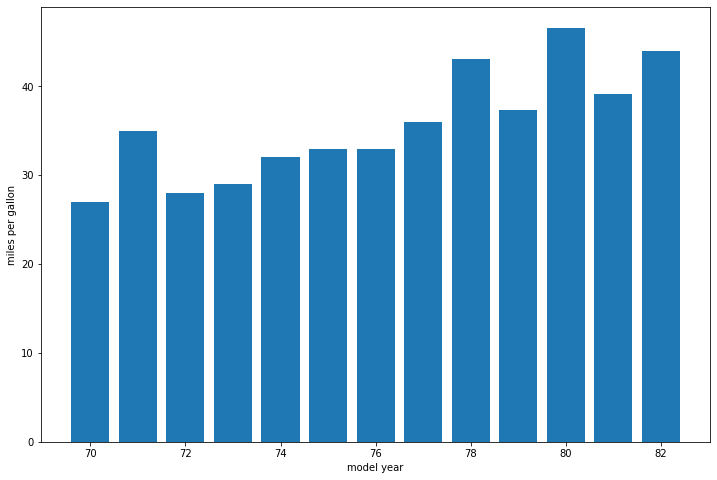

In [30]:
plt.figure(figsize=(12,8))
plt.bar(automobile_df['model year'], automobile_df['mpg'])
plt.xlabel('model year')
plt.ylabel('miles per gallon')


Text(0, 0.5, 'miles per gallon')

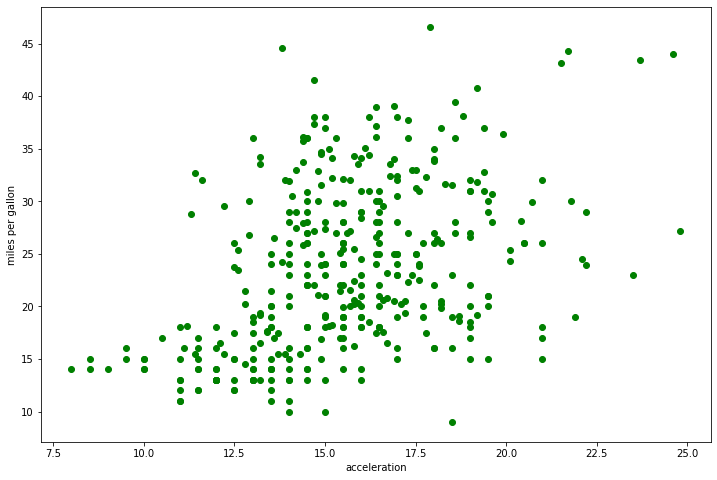

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['acceleration'], automobile_df['mpg'], color='g')
plt.xlabel('acceleration')
plt.ylabel('miles per gallon')


Text(0, 0.5, 'miles per gallon')

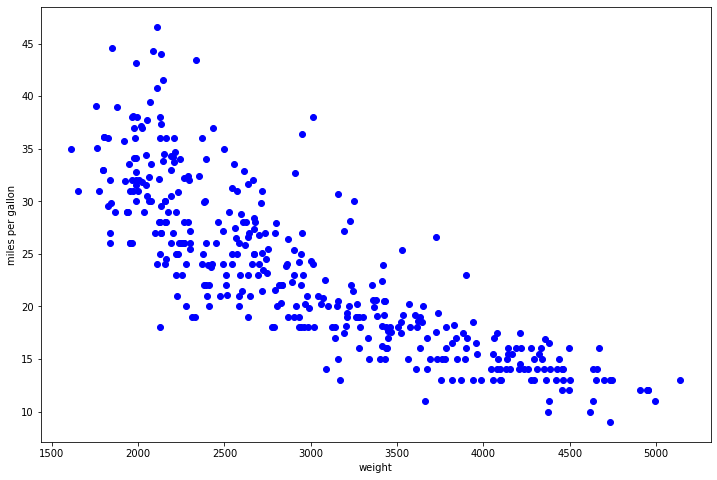

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['weight'], automobile_df['mpg'], color='b')
plt.xlabel('weight')
plt.ylabel('miles per gallon')


/home/usha/anaconda3/envs/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/usha/anaconda3/envs/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/usha/anaconda3/envs/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/usha/anacon

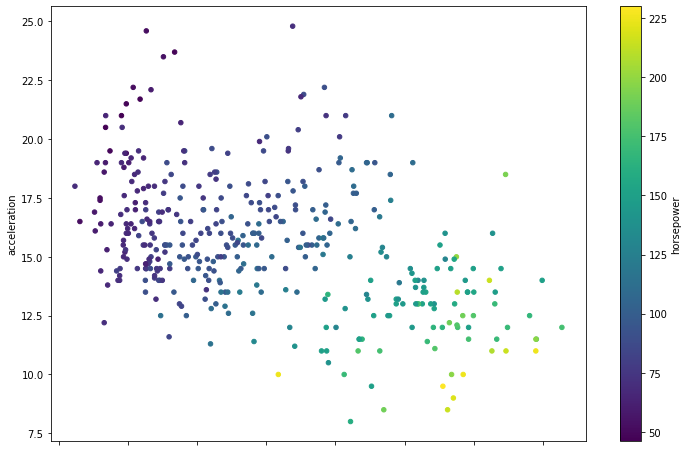

In [33]:
automobile_df.plot.scatter(x='weight', y='acceleration',
                          c= 'horsepower',colormap = 'viridis',
                          figsize=(12,8));

In [34]:
cars_corr = automobile_df.corr()
cars_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805120,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805120,0.950823,1.000000,0.897255,0.932996,-0.543801,-0.369838,-0.614519
horsepower,-0.778427,0.842983,0.897255,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932996,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543801,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369838,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614519,-0.455171,-0.585005,0.212746,0.181528,1.000000


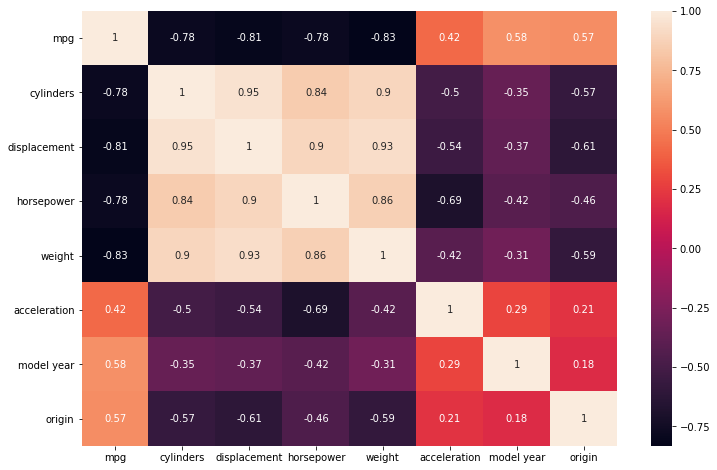

In [35]:
import seaborn as sns
fig,ax = plt.subplots(figsize = (12,8))
sns.heatmap(cars_corr, annot= True)